In [19]:
!pip install gplearn openpyxl xgboost catboost lightgbm shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.3 MB/s eta 0:00:00


In [20]:
import pandas as pd

df = pd.read_excel("input/S1File.xlsx")

In [21]:
df.head()

,ID,GE0DER,HEIGHT,WEIGHT,BMI,Age(1),KT_date,KT_TYPE,DONOR_TYPE,Cause_ESRD,...,CHANGE_cause_4,CHANGE_Date_4,CHANGE_5,CHANGE_pattern_5,CHANGE_cause_5,CHANGE_Date_5,CHANGE_6,CHANGE_pattern_6,CHANGE_cause_6,CHANGE_Date_6
0,01-001,1,166.0,58.5,21.2,28.013889,2012-01-02,2,1,1,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
1,01-002,1,165.9,70.8,25.7,47.188889,2012-01-03,2,2,5,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
2,01-003,2,160.3,50.0,19.5,50.913889,2012-01-04,1,1,8,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
3,01-004,2,156.0,60.4,24.8,39.877778,2012-01-06,1,2,3,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
4,01-005,1,170.6,75.6,26.0,36.130556,2012-01-06,1,2,3,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT


In [22]:
df.columns

Index(['ID', 'GE0DER', 'HEIGHT', 'WEIGHT', 'BMI', 'Age(1)', 'KT_date',
       'KT_TYPE', 'DONOR_TYPE', 'Cause_ESRD', 'DIALYSIS', 'MODALITY',
       'DURATION(M)', 'ABOi', 'HLA_MN', 'HIGHLY_SENSITIZED', 'PRA1', 'PRA2',
       'Bcell_CM', 'Tcell_CM', 'INDUCTION_YN', 'INDUCTION_TYPE',
       'INITIAL_MAINIS', 'INITIAL_CNI', 'INITIAL_MPA', 'MPA_dose',
       'ONEYEAR_MAINIS', 'ONEYEAR_CNI', 'ONEYEAR_MPA', 'LAB_date_DC',
       'LAB_date_ONEYEAR', 'sCR_DC', 'sCR_ONEYEAR', 'eGFR_DC', 'eGFR_ONEYEAR',
       'PostKT_MI', 'PostKT_HF', 'PostKT_CrVD', 'PostKT_DMsCx', 'PostKT_LIVER',
       'PostKT_tumor', 'Acuterejectio0', 'Graftfailure', 'GF_date',
       'Graft_survival_m', 'IS_CHANGE', 'CHANGE_1', 'CHANGE_pattern_1',
       'CHANGE_cause_1', 'CHANGE_Date_1', 'CHANGE_2', 'CHANGE_pattern_2',
       'CHANGE_cause_2', 'CHANGE_Date_2', 'CHANGE_3', 'CHANGE_pattern_3',
       'CHANGE_cause_3', 'CHANGE_Date_3', 'CHANGE_4', 'CHANGE_pattern_4',
       'CHANGE_cause_4', 'CHANGE_Date_4', 'CHANGE_5', 'CHAN

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')

def save_fig(name):
    plt.savefig(f'figures/{name}.png', dpi=300, facecolor='white', transparent=False)

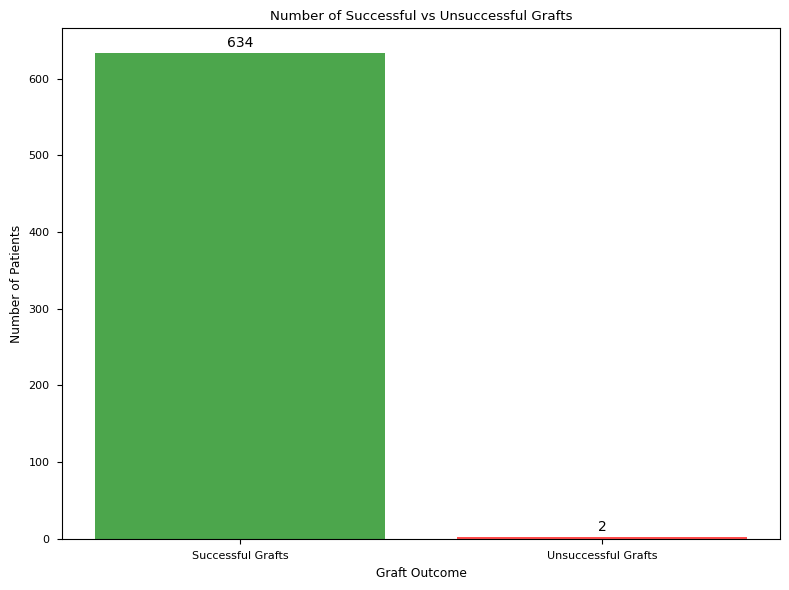

In [24]:
# Count successful and unsuccessful grafts
graft_counts = df['Graftfailure'].value_counts()
successful_count = graft_counts[0]  # Graftfailure = 0 means successful
unsuccessful_count = graft_counts[1]  # Graftfailure = 1 means unsuccessful

# Create bar plot
plt.figure(figsize=(8, 6))
categories = ['Successful Grafts', 'Unsuccessful Grafts']
counts = [successful_count, unsuccessful_count]

plt.bar(categories, counts, color=['green', 'red'], alpha=0.7)
plt.title('Number of Successful vs Unsuccessful Grafts')
plt.ylabel('Number of Patients')
plt.xlabel('Graft Outcome')

# Add value labels on top of bars
for i, count in enumerate(counts):
    plt.text(i, count + 4, str(count), ha='center', va='bottom')

plt.tight_layout()
save_fig('graft_outcome_distribution')
plt.show()

In [25]:
successful_graft_df = df[df['Graftfailure'] != 1]

successful_graft_df

,ID,GE0DER,HEIGHT,WEIGHT,BMI,Age(1),KT_date,KT_TYPE,DONOR_TYPE,Cause_ESRD,...,CHANGE_cause_4,CHANGE_Date_4,CHANGE_5,CHANGE_pattern_5,CHANGE_cause_5,CHANGE_Date_5,CHANGE_6,CHANGE_pattern_6,CHANGE_cause_6,CHANGE_Date_6
0,01-001,1,166.0,58.5,21.2,28.013889,2012-01-02,2,1,1,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
1,01-002,1,165.9,70.8,25.7,47.188889,2012-01-03,2,2,5,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
2,01-003,2,160.3,50.0,19.5,50.913889,2012-01-04,1,1,8,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
3,01-004,2,156.0,60.4,24.8,39.877778,2012-01-06,1,2,3,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
4,01-005,1,170.6,75.6,26.0,36.130556,2012-01-06,1,2,3,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,10-022,1,NaN,58.5,NaN,52.680556,2012-09-27,1,2,1,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
632,10-023,1,168.2,50.9,18.0,29.633333,2012-10-03,1,2,1,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
633,10-024,1,178.3,76.3,24.0,60.319444,2012-10-15,1,2,3,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
634,10-025,1,160.7,61.9,24.0,53.008333,2012-10-15,1,2,8,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT


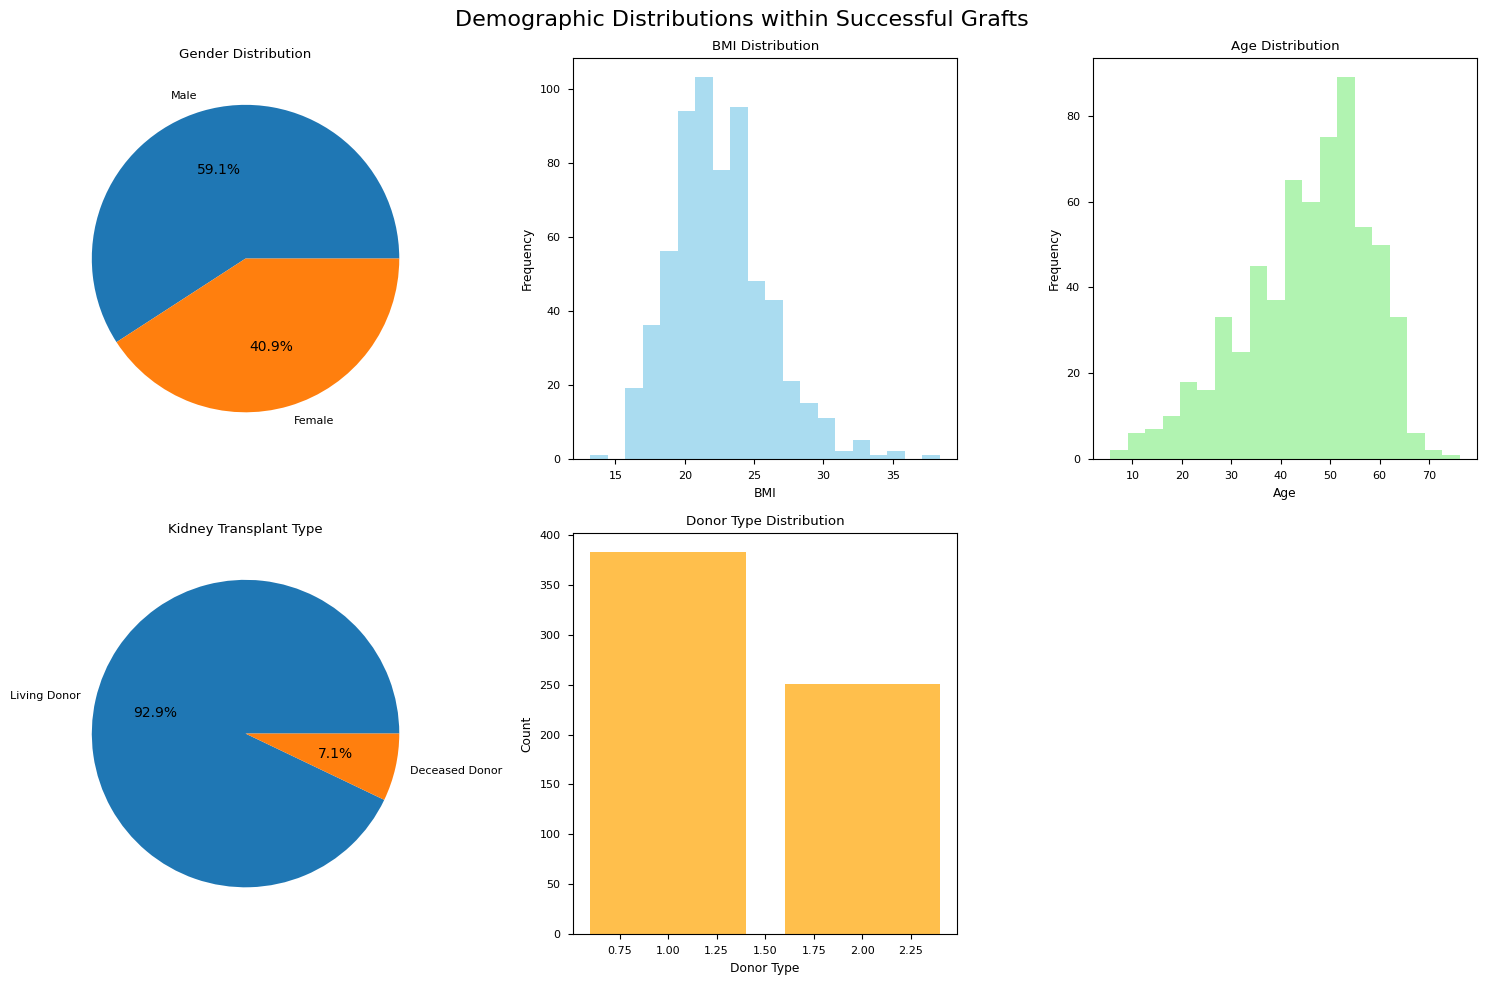

In [26]:
# Create mosaic plot for demographic distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Demographic Distributions within Successful Grafts', fontsize=16)

# Plot GE0DER (Gender)
gender_counts = successful_graft_df['GE0DER'].value_counts()
gender_labels = ['Male' if x == 1 else 'Female' for x in gender_counts.index]
axes[0, 0].pie(gender_counts.values, labels=gender_labels, autopct='%1.1f%%')
axes[0, 0].set_title('Gender Distribution')

# Plot BMI distribution
axes[0, 1].hist(successful_graft_df['BMI'].dropna(), bins=20, alpha=0.7, color='skyblue')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Plot Age distribution
axes[0, 2].hist(successful_graft_df['Age(1)'].dropna(), bins=20, alpha=0.7, color='lightgreen')
axes[0, 2].set_title('Age Distribution')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Frequency')

# Plot KT_TYPE
kt_type_counts = successful_graft_df['KT_TYPE'].value_counts()
kt_type_labels = ['Living Donor' if x == 1 else 'Deceased Donor' for x in kt_type_counts.index]
axes[1, 0].pie(kt_type_counts.values, labels=kt_type_labels, autopct='%1.1f%%')
axes[1, 0].set_title('Kidney Transplant Type')

# Plot DONOR_TYPE
donor_type_counts = successful_graft_df['DONOR_TYPE'].value_counts()
axes[1, 1].bar(donor_type_counts.index, donor_type_counts.values, color='orange', alpha=0.7)
axes[1, 1].set_title('Donor Type Distribution')
axes[1, 1].set_xlabel('Donor Type')
axes[1, 1].set_ylabel('Count')

# Remove the empty subplot
axes[1, 2].remove()

plt.tight_layout()
save_fig('demographics')
plt.show()

In [27]:
import numpy as np

# Identify numerical and categorical columns in X
numerical_columns = successful_graft_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = successful_graft_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:")
print(numerical_columns)
print(f"\nNumber of numerical columns: {len(numerical_columns)}")

print("\nCategorical columns:")
print(categorical_columns)
print(f"\nNumber of categorical columns: {len(categorical_columns)}")


Numerical columns:
['GE0DER', 'HEIGHT', 'WEIGHT', 'BMI', 'Age(1)', 'KT_TYPE', 'DONOR_TYPE', 'Cause_ESRD', 'DIALYSIS', 'MODALITY', 'DURATION(M)', 'ABOi', 'HLA_MN', 'HIGHLY_SENSITIZED', 'PRA1', 'PRA2', 'Bcell_CM', 'Tcell_CM', 'INDUCTION_YN', 'INDUCTION_TYPE', 'INITIAL_CNI', 'INITIAL_MPA', 'MPA_dose', 'ONEYEAR_CNI', 'ONEYEAR_MPA', 'sCR_DC', 'sCR_ONEYEAR', 'eGFR_DC', 'eGFR_ONEYEAR', 'PostKT_MI', 'PostKT_HF', 'PostKT_CrVD', 'PostKT_DMsCx', 'PostKT_LIVER', 'PostKT_tumor', 'Acuterejectio0', 'Graftfailure', 'Graft_survival_m', 'IS_CHANGE', 'CHANGE_1', 'CHANGE_2', 'CHANGE_3', 'CHANGE_4', 'CHANGE_5', 'CHANGE_6']

Number of numerical columns: 45

Categorical columns:
['ID', 'INITIAL_MAINIS', 'ONEYEAR_MAINIS', 'CHANGE_pattern_1', 'CHANGE_cause_1', 'CHANGE_pattern_2', 'CHANGE_cause_2', 'CHANGE_Date_2', 'CHANGE_pattern_3', 'CHANGE_cause_3', 'CHANGE_pattern_4', 'CHANGE_cause_4', 'CHANGE_pattern_5', 'CHANGE_cause_5', 'CHANGE_pattern_6', 'CHANGE_cause_6']

Number of categorical columns: 16


In [28]:
# Count missing values per row
missing_counts = successful_graft_df.isnull().sum(axis=1)

# Find the row with the minimum number of missing values
min_missing_idx = missing_counts.idxmin()
min_missing_count = missing_counts.min()

print(f"Row with least missing values: Index {min_missing_idx}")
print(f"Number of missing values: {min_missing_count}")
print("\nRow data:")
print(dict(successful_graft_df.loc[min_missing_idx]))

Row with least missing values: Index 55
Number of missing values: 7

Row data:
{'ID': '01-056', 'GE0DER': np.int64(1), 'HEIGHT': np.float64(178.0), 'WEIGHT': np.float64(58.1), 'BMI': np.float64(18.3), 'Age(1)': np.float64(28.352777777777778), 'KT_date': Timestamp('2012-10-29 00:00:00'), 'KT_TYPE': np.int64(1), 'DONOR_TYPE': np.int64(1), 'Cause_ESRD': np.int64(1), 'DIALYSIS': np.int64(0), 'MODALITY': np.int64(0), 'DURATION(M)': np.int64(0), 'ABOi': np.float64(2.0), 'HLA_MN': np.float64(1.0), 'HIGHLY_SENSITIZED': np.int64(0), 'PRA1': np.float64(0.0), 'PRA2': np.float64(0.0), 'Bcell_CM': np.int64(0), 'Tcell_CM': np.int64(0), 'INDUCTION_YN': np.int64(1), 'INDUCTION_TYPE': np.int64(1), 'INITIAL_MAINIS': 1, 'INITIAL_CNI': np.int64(2), 'INITIAL_MPA': np.int64(1), 'MPA_dose': np.int64(1500), 'ONEYEAR_MAINIS': 3, 'ONEYEAR_CNI': np.int64(2), 'ONEYEAR_MPA': np.int64(9), 'LAB_date_DC': Timestamp('2012-11-13 00:00:00'), 'LAB_date_ONEYEAR': Timestamp('2013-11-12 00:00:00'), 'sCR_DC': np.float64(1.72

In [29]:

X = successful_graft_df[[
    'INITIAL_MPA', 'INITIAL_MAINIS', 'INITIAL_CNI', 'DONOR_TYPE', 'PRA2', 'PRA1', 'Age(1)',
    'HEIGHT', 'WEIGHT', 'eGFR_DC', 'HLA_MN', 'KT_TYPE', 'sCR_DC', 'INDUCTION_TYPE',
    'INDUCTION_YN', 'GE0DER'
]]
y = successful_graft_df['MPA_dose']

str_columns = [col for col in X.columns if X[col].dtype == 'object']
print("Columns with string (object) data:")
print(str_columns)

for col in X.columns:
    X[col] = (X[col].map(lambda x: float(str(x).split(" ")[0].split("(")[0])))

X.to_csv('output/X.csv', index=False)

Columns with string (object) data:
['INITIAL_MAINIS']


/tmp/ipython-input-2084969183.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = (X[col].map(lambda x: float(str(x).split(" ")[0].split("(")[0])))


In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Create an IterativeImputer for multiple imputation
imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame with original column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

print("Multiple imputation completed!")
print(f"Original missing values: {X.isnull().sum().sum()}")
print(f"Missing values after imputation: {X_imputed.isnull().sum().sum()}")

# Display comparison of before and after for columns with missing values
missing_cols = X.columns[X.isnull().any()].tolist()
if missing_cols:
    print(f"\nColumns that had missing values: {missing_cols}")
    for col in missing_cols[:5]:  # Show first 5 columns with missing values
        print(f"\n{col}:")
        print(f"  Original mean: {X[col].mean():.2f}")
        print(f"  Imputed mean: {X_imputed[col].mean():.2f}")

Multiple imputation completed!
Original missing values: 7
Missing values after imputation: 0

Columns that had missing values: ['HEIGHT', 'WEIGHT', 'HLA_MN']

HEIGHT:
  Original mean: 164.49
  Imputed mean: 164.49

WEIGHT:
  Original mean: 61.27
  Imputed mean: 61.28

HLA_MN:
  Original mean: 3.25
  Imputed mean: 3.26


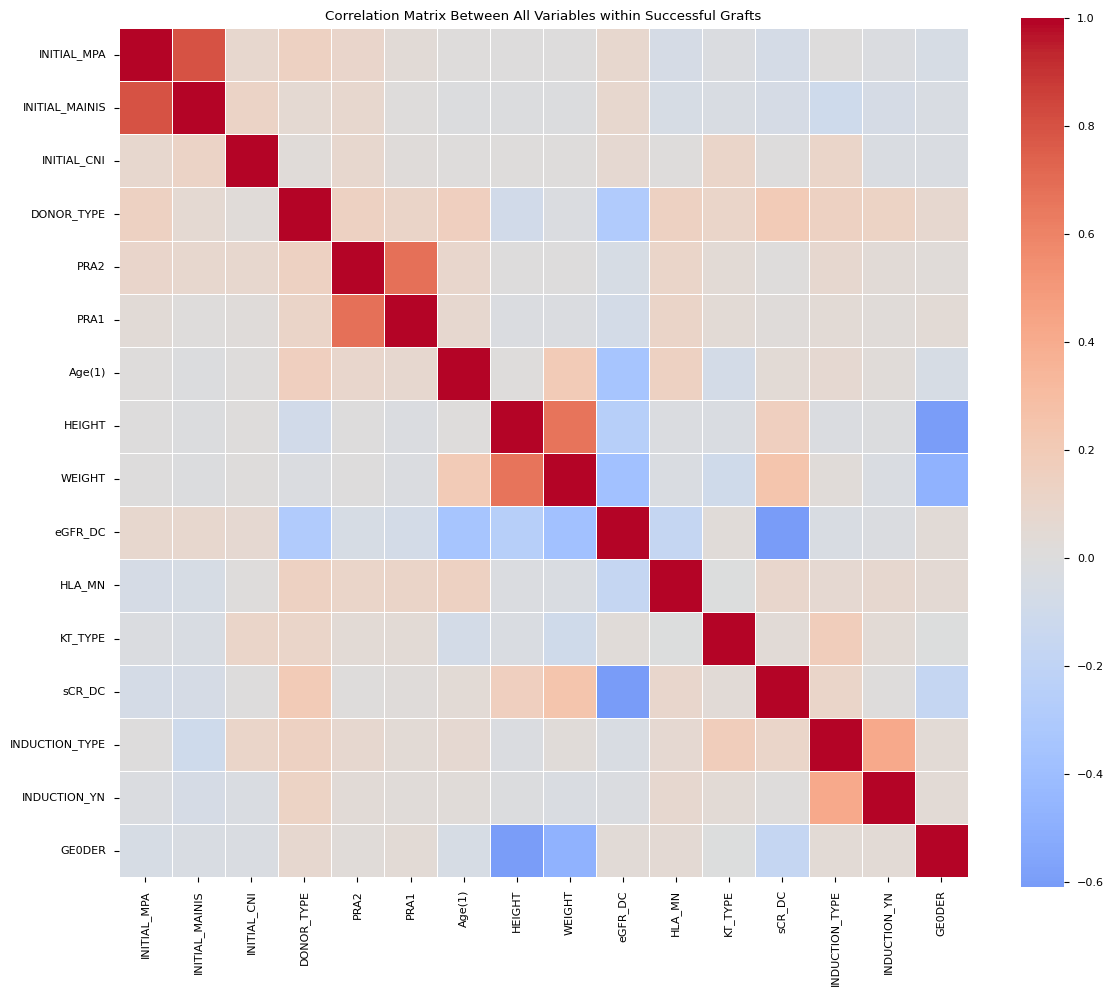

/tmp/ipython-input-4032809877.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_graft_df['Donor_Label'] = successful_graft_df['DONOR_TYPE'].map(donor_type_labels)
/tmp/ipython-input-4032809877.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([successful_graft_df[successful_graft_df['DONOR_TYPE']==1]['MPA_dose'],
/tmp/ipython-input-4032809877.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

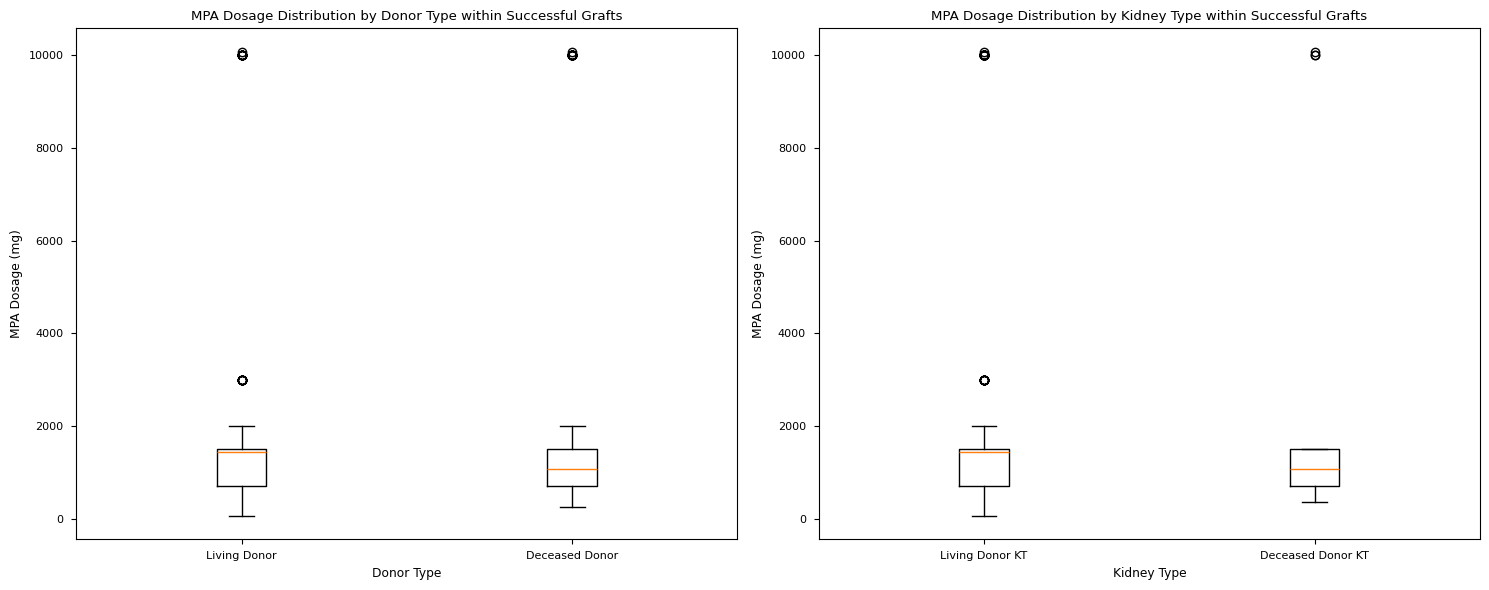

MPA Dosage Statistics by Donor Type:
Living Donor: Mean = 1642.2 mg
Deceased Donor: Mean = 2185.3 mg

MPA Dosage Statistics by Kidney Type:
Living Donor KT: Mean = 1873.6 mg
Deceased Donor KT: Mean = 1642.8 mg


In [31]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Correlation Analysis
plt.figure(figsize=(12, 10))

correlation_matrix = X.corr()

# Create correlation heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix Between All Variables within Successful Grafts')
plt.tight_layout()
save_fig('correlation_matrix')
plt.show()

# 2. MPA dosage analysis by Kidney Type and Donor Type
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# MPA dosage by Donor Type
donor_type_labels = {1: 'Living Donor', 2: 'Deceased Donor'}
successful_graft_df['Donor_Label'] = successful_graft_df['DONOR_TYPE'].map(donor_type_labels)

axes[0].boxplot([successful_graft_df[successful_graft_df['DONOR_TYPE']==1]['MPA_dose'],
                 successful_graft_df[successful_graft_df['DONOR_TYPE']==2]['MPA_dose']],
                labels=['Living Donor', 'Deceased Donor'])
axes[0].set_title('MPA Dosage Distribution by Donor Type within Successful Grafts')
axes[0].set_ylabel('MPA Dosage (mg)')
axes[0].set_xlabel('Donor Type')

# MPA dosage by Kidney Type
kt_type_labels = {1: 'Living Donor KT', 2: 'Deceased Donor KT'}
successful_graft_df['KT_Label'] = successful_graft_df['KT_TYPE'].map(kt_type_labels)

axes[1].boxplot([successful_graft_df[successful_graft_df['KT_TYPE']==1]['MPA_dose'],
                 successful_graft_df[successful_graft_df['KT_TYPE']==2]['MPA_dose']],
                labels=['Living Donor KT', 'Deceased Donor KT'])
axes[1].set_title('MPA Dosage Distribution by Kidney Type within Successful Grafts')
axes[1].set_ylabel('MPA Dosage (mg)')
axes[1].set_xlabel('Kidney Type')

plt.tight_layout()
save_fig('mpa_dosage_analysis')
plt.show()

# Print dosage statistics
print("MPA Dosage Statistics by Donor Type:")
for donor_type in [1, 2]:
    subset = successful_graft_df[successful_graft_df['DONOR_TYPE'] == donor_type]
    label = donor_type_labels[donor_type]
    mean_dose = subset['MPA_dose'].mean()
    print(f"{label}: Mean = {mean_dose:.1f} mg")

print("\nMPA Dosage Statistics by Kidney Type:")
for kt_type in [1, 2]:
    subset = successful_graft_df[successful_graft_df['KT_TYPE'] == kt_type]
    label = kt_type_labels[kt_type]
    mean_dose = subset['MPA_dose'].mean()
    print(f"{label}: Mean = {mean_dose:.1f} mg")

In [32]:
model_stats = {}

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=250, random_state=42, criterion='squared_error')
cv_scores_rf = cross_val_score(rf, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2_rf = cross_val_score(rf, X_imputed, y, cv=5, scoring='r2')

model_stats['Random Forest'] = {
    'mse_mean': -cv_scores_rf.mean(),
    'mse_std': cv_scores_rf.std(),
    'mae_mean': -cv_scores_mae_rf.mean(),
    'mae_std': cv_scores_mae_rf.std(),
    'r2_mean': cv_scores_r2_rf.mean(),
    'r2_std': cv_scores_r2_rf.std()
}

print("5-Fold CV MSE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_rf.mean(), cv_scores_rf.std()))
print("5-Fold CV MAE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_mae_rf.mean(), cv_scores_mae_rf.std()))
print("5-Fold CV R2 (mean ± std): {:.2f} ± {:.2f}".format(cv_scores_r2_rf.mean(), cv_scores_rf.std()))

5-Fold CV MSE (mean ± std): 908911.19 ± 823737.02
5-Fold CV MAE (mean ± std): 394.95 ± 125.29
5-Fold CV R2 (mean ± std): 0.65 ± 823737.02


In [34]:
from xgboost import XGBRegressor

# XGBoost Regressor

xgb = XGBRegressor(n_estimators=250, random_state=42, n_jobs=-1)
cv_scores_xgb = cross_val_score(xgb, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae_xgb = cross_val_score(xgb, X_imputed, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2_xgb = cross_val_score(xgb, X_imputed, y, cv=5, scoring='r2')

model_stats['XGBoost'] = {
    'mse_mean': -cv_scores_xgb.mean(),
    'mse_std': cv_scores_xgb.std(),
    'mae_mean': -cv_scores_mae_xgb.mean(),
    'mae_std': cv_scores_mae_xgb.std(),
    'r2_mean': cv_scores_r2_xgb.mean(),
    'r2_std': cv_scores_r2_xgb.std()
}

print("XGBoost Results:")
print("5-Fold CV MSE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_xgb.mean(), cv_scores_xgb.std()))
print("5-Fold CV MAE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_mae_xgb.mean(), cv_scores_mae_xgb.std()))
print("5-Fold CV R2 (mean ± std): {:.2f} ± {:.2f}".format(cv_scores_r2_xgb.mean(), cv_scores_r2_xgb.std()))

XGBoost Results:
5-Fold CV MSE (mean ± std): 992154.29 ± 815103.83
5-Fold CV MAE (mean ± std): 450.72 ± 93.16
5-Fold CV R2 (mean ± std): 0.62 ± 0.37


In [35]:
from catboost import CatBoostRegressor

# CatBoost Regressor
catboost = CatBoostRegressor(iterations=250, random_seed=42, verbose=False)
cv_scores_catboost = cross_val_score(catboost, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae_catboost = cross_val_score(catboost, X_imputed, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2_catboost = cross_val_score(catboost, X_imputed, y, cv=5, scoring='r2')

model_stats['CatBoost'] = {
    'mse_mean': -cv_scores_catboost.mean(),
    'mse_std': cv_scores_catboost.std(),
    'mae_mean': -cv_scores_mae_catboost.mean(),
    'mae_std': cv_scores_mae_catboost.std(),
    'r2_mean': cv_scores_r2_catboost.mean(),
    'r2_std': cv_scores_r2_catboost.std()
}

print("CatBoost Results:")
print("5-Fold CV MSE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_catboost.mean(), cv_scores_catboost.std()))
print("5-Fold CV MAE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_mae_catboost.mean(), cv_scores_mae_catboost.std()))
print("5-Fold CV R2 (mean ± std): {:.2f} ± {:.2f}".format(cv_scores_r2_catboost.mean(), cv_scores_r2_catboost.std()))

CatBoost Results:
5-Fold CV MSE (mean ± std): 1033290.30 ± 733475.88
5-Fold CV MAE (mean ± std): 483.33 ± 118.34
5-Fold CV R2 (mean ± std): 0.63 ± 0.34


In [36]:
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgbm = LGBMRegressor(n_estimators=250, random_state=42, n_jobs=-1)
cv_scores_lgbm = cross_val_score(lgbm, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae_lgbm = cross_val_score(lgbm, X_imputed, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2_lgbm = cross_val_score(lgbm, X_imputed, y, cv=5, scoring='r2')

model_stats['LightGBM'] = {
    'mse_mean': -cv_scores_lgbm.mean(),
    'mse_std': cv_scores_lgbm.std(),
    'mae_mean': -cv_scores_mae_lgbm.mean(),
    'mae_std': cv_scores_mae_lgbm.std(),
    'r2_mean': cv_scores_r2_lgbm.mean(),
    'r2_std': cv_scores_r2_lgbm.std()
}

print("LightGBM Results:")
print("5-Fold CV MSE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_lgbm.mean(), cv_scores_lgbm.std()))
print("5-Fold CV MAE (mean ± std): {:.2f} ± {:.2f}".format(-cv_scores_mae_lgbm.mean(), cv_scores_mae_lgbm.std()))
print("5-Fold CV R2 (mean ± std): {:.2f} ± {:.2f}".format(cv_scores_r2_lgbm.mean(), cv_scores_r2_lgbm.std()))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 15
[LightGBM] [Info] Start training from score 1887.909270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [42]:
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Symbolic Regressor from gplearn
gplearn_reg = SymbolicRegressor(
    population_size=5000, generations=100, stopping_criteria=0.01,
    p_crossover=0.7, p_subtree_mutation=0.1, p_hoist_mutation=0.05,
    p_point_mutation=0.1, max_samples=0.9, verbose=1, random_state=42, n_jobs=-1
)

# Fit once
gplearn_reg.fit(X_imputed, y)

# Predict on the same training set (or split if you want a true test eval)
y_pred = gplearn_reg.predict(X_imputed)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Store results with std set to zero
model_stats['SymbolicRegressor'] = {
    'mse_mean': mse,
    'mse_std': 0.0,
    'mae_mean': mae,
    'mae_std': 0.0,
    'r2_mean': r2,
    'r2_std': 0.0
}

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0    26.16       1.5758e+17       15          1074.33          1349.45      3.70m
   1    13.48           285977       31          955.711          1218.89      2.65m
   2    25.33          40411.6       35          771.387          695.279      3.03m
   3    27.38          38150.6       27          753.498          895.876      3.11m
   4    31.47      2.26119e+06       31          697.968          665.368      3.15m
   5    32.90          58358.3       31          606.156          943.323      3.40m
   6    31.76      2.48231e+06       25          584.668          1115.03      3.22m
   7    32.33          7857.77       39          557.941          1239.67      3.51m
   8    32.14            12814       47          531.835          519.934      3.42m
   9    33.90           255954       35              454            871.4      3.58m
  10    36.47          12408.1       37          381.278          514.873      3.44m
  11    39.49          26420.3       27          367.533         

In [43]:
model_stats_df = pd.DataFrame(model_stats).T

model_stats_df.to_csv('output/model_stats.csv')

model_stats_df

,mse_mean,mse_std,mae_mean,mae_std,r2_mean,r2_std
Random Forest,9.089112e+05,8.237370e+05,394.945111,125.291791,0.647083,0.365289
XGBoost,9.921543e+05,8.151038e+05,450.718530,93.159116,0.622239,0.373864
CatBoost,1.033290e+06,7.334759e+05,483.325104,118.342749,0.628233,0.344968
LightGBM,3.911136e+06,5.444037e+06,868.135473,677.570474,0.405166,0.405065
SymbolicRegressor,7.002574e+05,0.000000e+00,334.830015,0.000000,0.879203,0.000000


In [46]:
print(gplearn_reg._program)

add(add(div(div(add(add(add(div(mul(X7, -0.457), -0.051), mul(X7, -0.457)), add(div(add(div(mul(X0, X9), mul(X1, X14)), add(div(add(div(mul(X12, X9), add(add(X0, X15), div(add(div(mul(X12, X9), add(add(div(X2, X15), add(div(X2, X15), X13)), mul(div(sub(add(X11, X15), add(X3, X13)), add(mul(X10, X0), X15)), div(div(add(add(add(div(mul(X7, -0.457), -0.051), X7), add(div(mul(X0, X7), add(add(mul(X13, sub(sub(X6, X1), X14)), div(mul(add(add(div(mul(X7, -0.457), -0.051), mul(X7, -0.457)), add(div(add(add(mul(X7, X0), mul(X7, -0.457)), add(div(add(div(mul(X12, X9), add(mul(X0, X9), div(add(add(add(div(mul(X7, -0.457), -0.051), mul(X7, -0.457)), add(div(add(add(mul(X7, X0), mul(X7, -0.457)), add(div(add(div(mul(X12, X9), add(add(X0, X15), div(add(div(mul(X12, X9), add(add(div(X2, X15), add(div(X2, X15), X13)), mul(div(sub(add(X11, X15), add(X3, X13)), add(mul(X10, X0), X15)), div(div(add(add(add(div(mul(X7, -0.457), -0.051), X7), add(div(mul(X0, X7), add(div(mul(add(add(div(mul(X7, -0.457), -

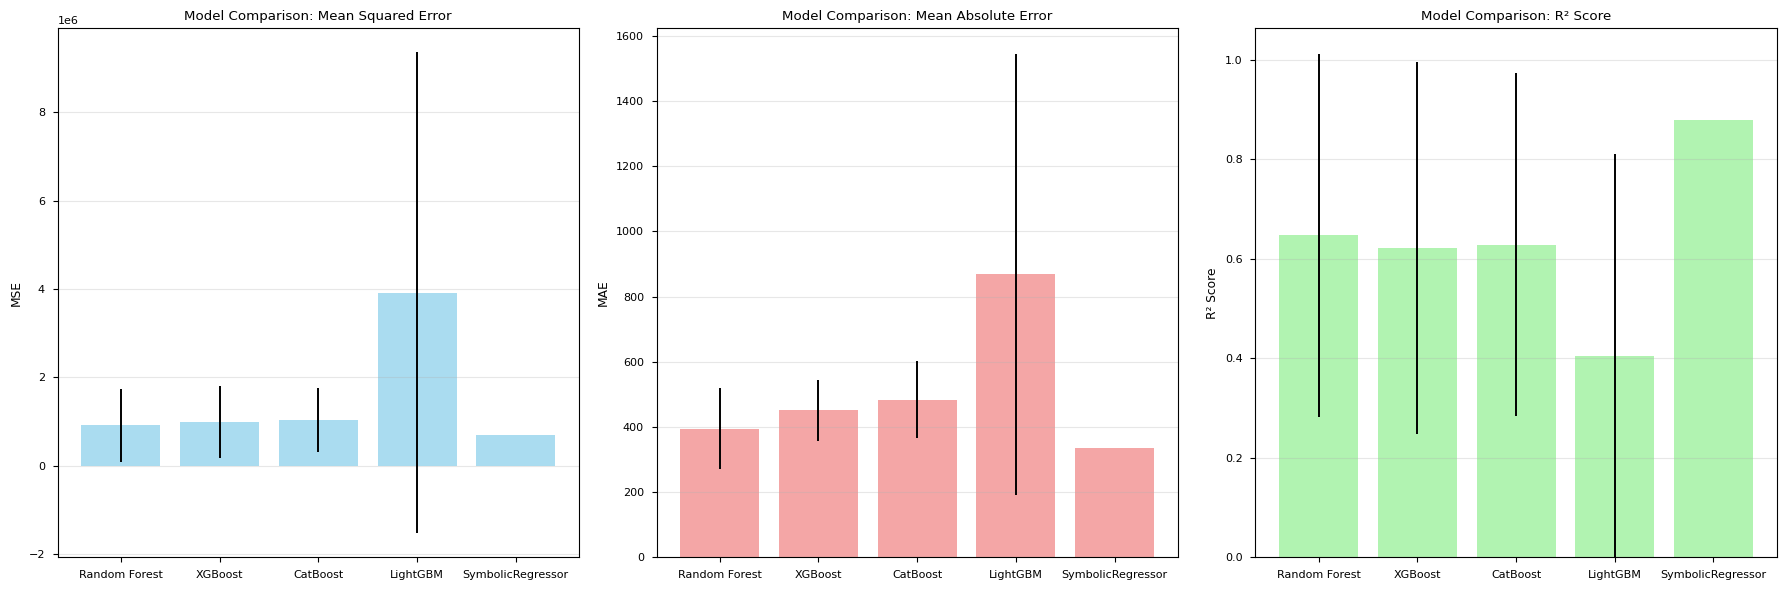

In [47]:
# Create a comprehensive model comparison plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: MSE Comparison
models = model_stats_df.index
mse_means = model_stats_df['mse_mean']
mse_stds = model_stats_df['mse_std']

axes[0].bar(models, mse_means, yerr=mse_stds, capsize=5, alpha=0.7, color='skyblue')
axes[0].set_title('Model Comparison: Mean Squared Error')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: MAE Comparison
mae_means = model_stats_df['mae_mean']
mae_stds = model_stats_df['mae_std']

axes[1].bar(models, mae_means, yerr=mae_stds, capsize=5, alpha=0.7, color='lightcoral')
axes[1].set_title('Model Comparison: Mean Absolute Error')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x')
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: R² Score Comparison
r2_means = model_stats_df['r2_mean']
r2_stds = model_stats_df['r2_std']

axes[2].bar(models, r2_means, yerr=r2_stds, capsize=5, alpha=0.7, color='lightgreen')
axes[2].set_title('Model Comparison: R² Score')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
save_fig('model_comparison')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 634, number of used features: 15
[LightGBM] [Info] Start training from score 1857.231861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

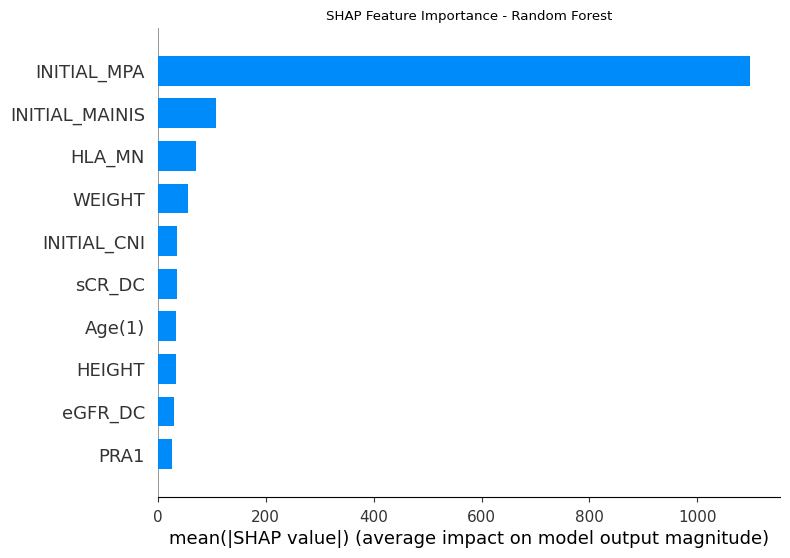

Generating SHAP summary plot for XGBoost...


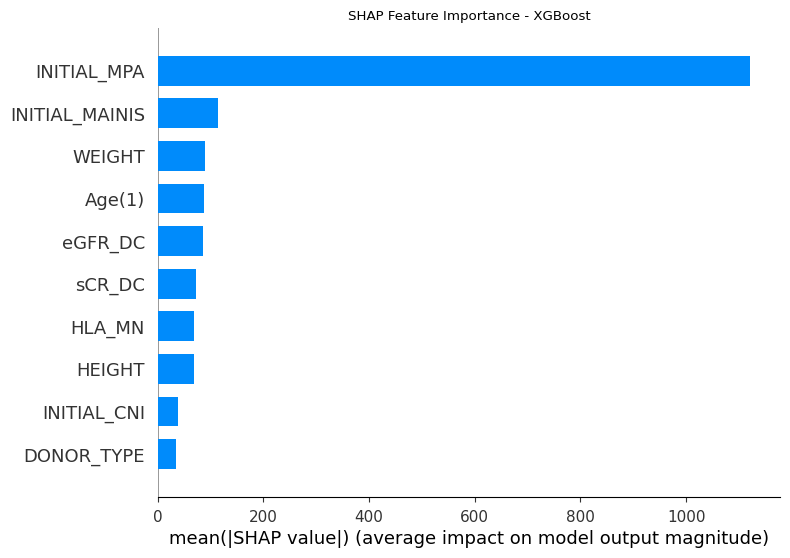

Generating SHAP summary plot for CatBoost...


CatBoostError: Model is not fitted

<Figure size 1000x600 with 0 Axes>

In [40]:
import shap

# Prepare models and names
models = [
    ('Random Forest', rf),
    ('XGBoost', xgb),
    ('CatBoost', catboost),
    ('LightGBM', lgbm),
    ('SymbolicRegressor', gplearn_reg)
]

X_display = X_imputed.copy()

# Fit all models (if not already fitted)
for name, model in models:
    if not hasattr(model, 'feature_importances_') and name != 'SymbolicRegressor':
        model.fit(X_display, y)
    elif name == 'SymbolicRegressor':
      pass

# Prepare SHAP explainers and plot summary plots
for name, model in models:
    print(f"Generating SHAP summary plot for {name}...")
    plt.figure(figsize=(10, 6))

    if name == 'SymbolicRegressor':
        continue
    elif name in ['CatBoost', 'LightGBM', 'Random Forest', 'XGBoost']:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_display)
        shap.summary_plot(shap_values, X_display, feature_names=X_display.columns, plot_type="bar", max_display=10, show=False)

    plt.title(f'SHAP Feature Importance - {name}')
    save_fig(f'shap_{name.lower().replace(" ", "_")}')
    plt.show()
